### Applied Machine Learning 5c

##### Date: May 1 2020
##### Author: Jung Ah Shin 
##### Data source: https://lhncbc.nlm.nih.gov/publication/pub9932


*Train CNN to classify cells infected with malaria*


In [ ]:
import tensorflow as tf
import keras

import cv2
from keras.utils import np_utils

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization
from keras.layers import Dense, Activation
from keras.layers import ZeroPadding2D
from keras.layers import AveragePooling2D

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator

import PIL
import os

Using TensorFlow backend.


In [ ]:
# # Access data
# ! wget ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip
# ! unzip cell_images.zip

In [ ]:
labels = os.listdir("/content/cell_images/")
data_dir = "/content/cell_images/"

num_train = 27560
num_classes = 2
X = np.ndarray((num_train, 90,90,3))
y = np.zeros((num_train,))

i=0
j=0
for label in labels:
    print(label)
    image_names_train = os.listdir(os.path.join(data_dir, label))
    total = len(image_names_train)
    
    for image_name in image_names_train:
        if image_name == 'Thumbs.db':
          continue
        img = PIL.Image.open(os.path.join(data_dir, label, image_name))
        img = np.asarray(img.resize((90,90))) / 255.0
        X[i] = img
        y[i] = j

        i +=1
    j+=1
y = np_utils.to_categorical(y[:num_train], num_classes)


Uninfected
Parasitized


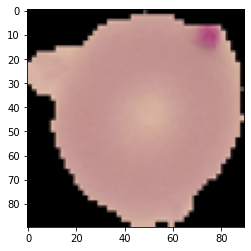

In [ ]:
plt.imshow(X[20000])

In [ ]:
# Split train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape #(20670, 90, 90, 3)
X_test.shape #(6890, 90, 90, 3)

(6890, 90, 90, 3)

#### 3.1​ CNN without residual connections 

In [ ]:
batch_size = 128
input_shape = (90, 90, 3)
num_classes = 2

cnn = Sequential([
                  Conv2D(8, kernel_size=(3,3),
                         input_shape=input_shape,
                         activation='relu'),
                  BatchNormalization(),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(32, kernel_size=(3,3), activation='relu'),
                  BatchNormalization(),
                  MaxPooling2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(8, activation='relu'),
                  BatchNormalization(),
                  Dense(num_classes, activation='softmax')
                  
])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 88, 88, 8)         224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 88, 88, 8)         32        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 44, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 32)        2336      
_________________________________________________________________
batch_normalization_2 (Batch (None, 42, 42, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14112)            

In [ ]:
cnn.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn.fit(X_train, y_train, batch_size = batch_size, epochs=10, 
                      verbose=1, validation_split=.1)
cnn.evaluate(X_test, y_test)

Train on 18603 samples, validate on 2067 samples
Epoch 1/10
18603/18603 [==============================] - 12s 635us/step - loss: 0.5476 - accuracy: 0.7292 - val_loss: 1.4295 - val_accuracy: 0.4930
Epoch 2/10
18603/18603 [==============================] - 5s 275us/step - loss: 0.2555 - accuracy: 0.9032 - val_loss: 5.2257 - val_accuracy: 0.4930
Epoch 3/10
18603/18603 [==============================] - 5s 275us/step - loss: 0.1712 - accuracy: 0.9396 - val_loss: 6.0643 - val_accuracy: 0.4935
Epoch 4/10
18603/18603 [==============================] - 5s 274us/step - loss: 0.1490 - accuracy: 0.9464 - val_loss: 3.3843 - val_accuracy: 0.5307
Epoch 5/10
18603/18603 [==============================] - 5s 274us/step - loss: 0.1246 - accuracy: 0.9550 - val_loss: 0.4848 - val_accuracy: 0.8452
Epoch 6/10
18603/18603 [==============================] - 5s 274us/step - loss: 0.1131 - accuracy: 0.9597 - val_loss: 0.4489 - val_accuracy: 0.8781
Epoch 7/10
18603/18603 [==============================] - 5s 2

[0.19682056094980724, 0.9390420913696289]

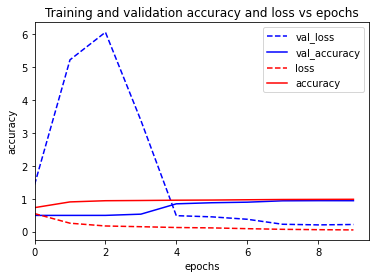

In [ ]:
pd.DataFrame(history_cnn.history).plot(color=['b','b','r','r'], style=['--','-','--','-'])
plt.xlim(xmin=0)
plt.title('Training and validation accuracy and loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy');


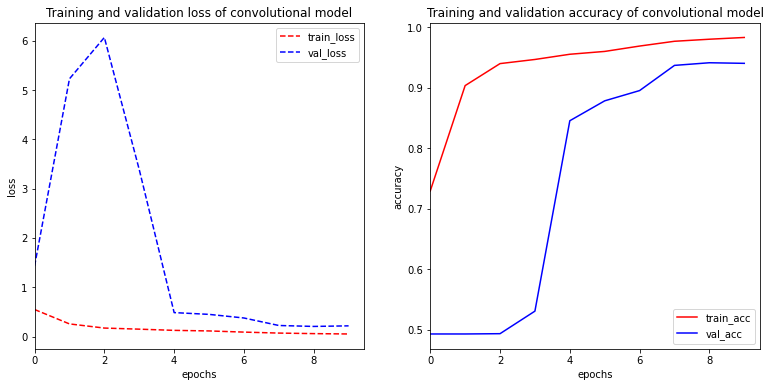

In [ ]:
N = 10

fig,ax = plt.subplots(1,2, figsize=(13,6))
ax[0].plot(np.arange(0, N), history_cnn.history["loss"], 'r--',label="train_loss") 
ax[0].plot(np.arange(0, N), history_cnn.history["val_loss"],'b--', label="val_loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Training and validation loss of convolutional model')
ax[0].set_xlim(xmin=0)
ax[0].legend(loc="upper right")

ax[1].plot(np.arange(0, N), history_cnn.history["accuracy"], label="train_acc", color='red')
ax[1].plot(np.arange(0, N), history_cnn.history["val_accuracy"], label="val_acc",color='blue')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_title('Training and validation accuracy of convolutional model');
ax[1].set_xlim(xmin=0)
ax[1].legend(loc="lower right");

#### 3.2 Data Augmentation (Rotations, Mirroring)
​

In [ ]:
# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2) 

datagen.fit(X_train)

#fits the model on batches with real-time data augmentation
history_augment = cnn.fit_generator( #_generator
                          datagen.flow(X_train, y_train, batch_size=batch_size),
                          validation_data=(X_test,y_test),
                          steps_per_epoch=len(X_train)/32, 
                          verbose=1,
                          epochs=10)

Epoch 1/10
646/645 [==============================] - 139s 215ms/step - loss: 0.2438 - accuracy: 0.9133 - val_loss: 0.1420 - val_accuracy: 0.9520
Epoch 2/10
646/645 [==============================] - 136s 211ms/step - loss: 0.1988 - accuracy: 0.9310 - val_loss: 0.1744 - val_accuracy: 0.9553
Epoch 3/10
646/645 [==============================] - 134s 208ms/step - loss: 0.1928 - accuracy: 0.9344 - val_loss: 0.1871 - val_accuracy: 0.9419
Epoch 4/10
646/645 [==============================] - 132s 205ms/step - loss: 0.1825 - accuracy: 0.9370 - val_loss: 0.1290 - val_accuracy: 0.9576
Epoch 5/10
646/645 [==============================] - 133s 205ms/step - loss: 0.1749 - accuracy: 0.9390 - val_loss: 0.1488 - val_accuracy: 0.9492
Epoch 6/10
646/645 [==============================] - 132s 205ms/step - loss: 0.1684 - accuracy: 0.9420 - val_loss: 0.1983 - val_accuracy: 0.9356
Epoch 7/10
646/645 [==============================] - 136s 211ms/step - loss: 0.1657 - accuracy: 0.9431 - val_loss: 0.1273 -

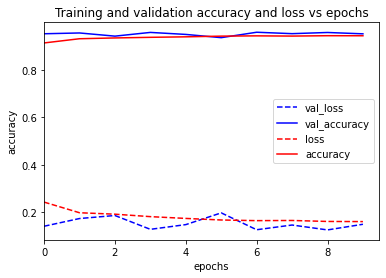

In [ ]:
pd.DataFrame(history_augment.history).plot(color=['b','b','r','r'], style=['--','-','--','-'])
plt.xlim(xmin=0)
plt.title('Training and validation accuracy and loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy');


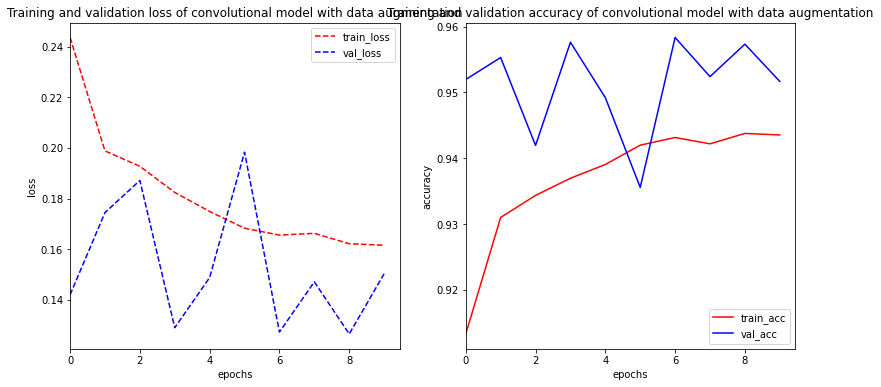

In [ ]:
N = 10

fig,ax = plt.subplots(1,2, figsize=(13,6))
ax[0].plot(np.arange(0, N), history_augment.history["loss"], 'r--',label="train_loss") 
ax[0].plot(np.arange(0, N), history_augment.history["val_loss"],'b--', label="val_loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Training and validation loss of convolutional model with data augmentation')
ax[0].set_xlim(xmin=0)
ax[0].legend(loc="upper right")

ax[1].plot(np.arange(0, N), history_augment.history["accuracy"], label="train_acc", color='red')
ax[1].plot(np.arange(0, N), history_augment.history["val_accuracy"], label="val_acc",color='blue')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_title('Training and validation accuracy of convolutional model with data augmentation');
ax[1].set_xlim(xmin=0)
ax[1].legend(loc="lower right");

Based on the performane on validation data, we can observe that the original model trained with augmented data performs better than the original model. The validation accuracy per epoch are in the mid-90 range for the data augmented model, while the original model's validation accuracy is in the late 80s to early 90s range. 

#### 3.3 Deeper Model using Residual Connections ​ 

* Compare a deep model with and without residual connections while the rest of the architecture is constant. * Commonly used architectures here:
https://keras.io/applications/


##### Resnet50 model (residual connections)

In [ ]:
resnet = keras.applications.resnet.ResNet50(include_top=True, weights=None, input_tensor=None, input_shape=input_shape, pooling=None, classes=2)

In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 90, 90, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 96, 96, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 45, 45, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 45, 45, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
resnet.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
history_resnet = resnet.fit(X_train, y_train, batch_size = batch_size, epochs=10, 
                      verbose=1, validation_split=.1)
resnet.evaluate(X_test, y_test)

Train on 18603 samples, validate on 2067 samples
Epoch 1/10
18603/18603 [==============================] - 59s 3ms/step - loss: 0.1052 - accuracy: 0.9683 - val_loss: 0.6169 - val_accuracy: 0.7939
Epoch 2/10
18603/18603 [==============================] - 44s 2ms/step - loss: 0.0691 - accuracy: 0.9758 - val_loss: 0.1758 - val_accuracy: 0.9400
Epoch 3/10
18603/18603 [==============================] - 44s 2ms/step - loss: 0.0589 - accuracy: 0.9788 - val_loss: 0.1850 - val_accuracy: 0.9511
Epoch 4/10
18603/18603 [==============================] - 44s 2ms/step - loss: 0.0517 - accuracy: 0.9813 - val_loss: 0.1340 - val_accuracy: 0.9613
Epoch 5/10
18603/18603 [==============================] - 44s 2ms/step - loss: 0.0419 - accuracy: 0.9844 - val_loss: 0.2035 - val_accuracy: 0.9540
Epoch 6/10
18603/18603 [==============================] - 44s 2ms/step - loss: 0.0399 - accuracy: 0.9856 - val_loss: 0.2414 - val_accuracy: 0.9478
Epoch 7/10
18603/18603 [==============================] - 44s 2ms/ste

[0.18264607728744764, 0.9570391774177551]

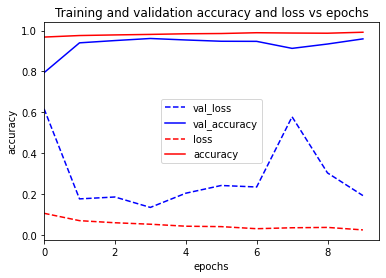

In [ ]:
pd.DataFrame(history_resnet.history).plot(color=['b','b','r','r'], style=['--','-','--','-'])
plt.xlim(xmin=0)
plt.title('Training and validation accuracy and loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy');

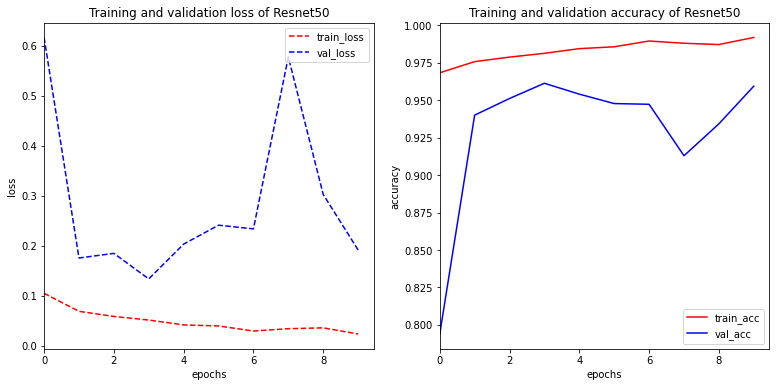

In [ ]:
N = 10

fig,ax = plt.subplots(1,2, figsize=(13,6))
ax[0].plot(np.arange(0, N), history_resnet.history["loss"], 'r--',label="train_loss") 
ax[0].plot(np.arange(0, N), history_resnet.history["val_loss"],'b--', label="val_loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Training and validation loss of Resnet50')
ax[0].set_xlim(xmin=0)
ax[0].legend(loc="upper right")

ax[1].plot(np.arange(0, N), history_resnet.history["accuracy"], label="train_acc", color='red')
ax[1].plot(np.arange(0, N), history_resnet.history["val_accuracy"], label="val_acc",color='blue')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_title('Training and validation accuracy of Resnet50');
ax[1].set_xlim(xmin=0)
ax[1].legend(loc="lower right");

##### Resnet50 (without residual connections)

In [ ]:
resnet50_model = Sequential([
                             
                            # #Zero-padding
                            ZeroPadding2D((3, 3)),

                            # Stage 1
                            Conv2D(32, (7, 7), input_shape=input_shape, padding='same'), #kernel_initializer = glorot_uniform(seed=0)
                            #strides = (1, 1),
                            BatchNormalization(),
                            Activation('relu'),
                            MaxPooling2D((3, 3)),

                            # Stage 2
                            Conv2D(64, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(64, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(256, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),

                            Conv2D(64, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(64, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(256, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            
                            Conv2D(64, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(64, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(256, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                          

                            # Stage 3
                            Conv2D(128, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(128, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(512, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
  
                            Conv2D(128, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(128, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(512, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),

                            Conv2D(128, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(128, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(512, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            

                            # Stage 4 

                            Conv2D(256, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(256, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(1024, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),

                            Conv2D(256, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(256, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(1024, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),

                            Conv2D(256, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(256, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(1024, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),

                            Conv2D(256, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(256, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(1024, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),

                            Conv2D(256, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(256, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(1024, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),

                            Conv2D(256, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(256, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(1024, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                          

                            # Stage 5 

                            Conv2D(512, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(512, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(2048, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            
                            Conv2D(512, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(512, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(2048, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),

                            Conv2D(512, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(512, (3, 3),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),
                            Conv2D(2048, (1, 1),padding='same'),
                            BatchNormalization(),
                            Activation('relu'),

                            # AVGPOOL
                            AveragePooling2D(pool_size=(2,2)),                

                            # output layer
                            Flatten(),
                            Dense(num_classes, activation='softmax')#, kernel_initializer = glorot_uniform(seed=0)
                            
])

In [ ]:
resnet50_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_688 (Conv2D)          (None, 96, 96, 32)        4736      
_________________________________________________________________
batch_normalization_689 (Bat (None, 96, 96, 32)        128       
_________________________________________________________________
activation_691 (Activation)  (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_689 (Conv2D)          (None, 32, 32, 64)        2112      
_________________________________________________________________
batch_normalization_690 (Bat (None, 32, 32, 64)      

In [ ]:
resnet50_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
history_resnet50_model = resnet50_model.fit(X_train, y_train, epochs=10, 
                      verbose=1, batch_size = batch_size, validation_split=.1)
resnet50_model.evaluate(X_test, y_test)

Train on 18603 samples, validate on 2067 samples
Epoch 1/10
18603/18603 [==============================] - 493s 26ms/step - loss: 1.5977 - accuracy: 0.5495 - val_loss: 0.7620 - val_accuracy: 0.5070
Epoch 2/10
18603/18603 [==============================] - 479s 26ms/step - loss: 0.6574 - accuracy: 0.6238 - val_loss: 0.7040 - val_accuracy: 0.5970
Epoch 3/10
18603/18603 [==============================] - 479s 26ms/step - loss: 0.6367 - accuracy: 0.6472 - val_loss: 0.6286 - val_accuracy: 0.6570
Epoch 4/10
18603/18603 [==============================] - 479s 26ms/step - loss: 0.6055 - accuracy: 0.6778 - val_loss: 0.6911 - val_accuracy: 0.5864
Epoch 5/10
18603/18603 [==============================] - 479s 26ms/step - loss: 0.5823 - accuracy: 0.6981 - val_loss: 0.7292 - val_accuracy: 0.5119
Epoch 6/10
18603/18603 [==============================] - 479s 26ms/step - loss: 0.6165 - accuracy: 0.6625 - val_loss: 0.6336 - val_accuracy: 0.6507
Epoch 7/10
18603/18603 [==============================] -

[0.252400910677537, 0.9188679456710815]

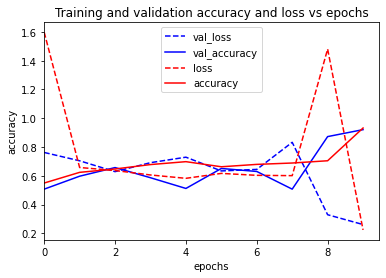

In [ ]:
pd.DataFrame(history_resnet50_model.history).plot(color=['b','b','r','r'], style=['--','-','--','-'])
plt.xlim(xmin=0)
plt.title('Training and validation accuracy and loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy');

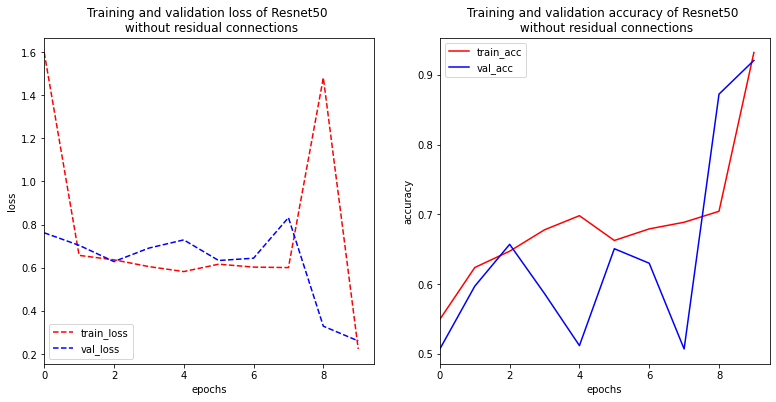

In [ ]:
N = 10

fig,ax = plt.subplots(1,2, figsize=(13,6))
ax[0].plot(np.arange(0, N), history_resnet50_model.history["loss"], 'r--',label="train_loss") 
ax[0].plot(np.arange(0, N), history_resnet50_model.history["val_loss"],'b--', label="val_loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Training and validation loss of Resnet50 \n without residual connections')
ax[0].set_xlim(xmin=0)
ax[0].legend(loc="lower left")

ax[1].plot(np.arange(0, N), history_resnet50_model.history["accuracy"], label="train_acc", color='red')
ax[1].plot(np.arange(0, N), history_resnet50_model.history["val_accuracy"], label="val_acc",color='blue')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_title('Training and validation accuracy of Resnet50 \n without residual connections');
ax[1].set_xlim(xmin=0)
ax[1].legend(loc="upper left");

The Resnet50 model without residuals connections does not seem to train properly, as the accuracy for both train and validation data fluctuate significantly and for the first 8 epochs, the validation accuracy range between 0.5 to 0.6. 

#### 3.4 Final Evaluation

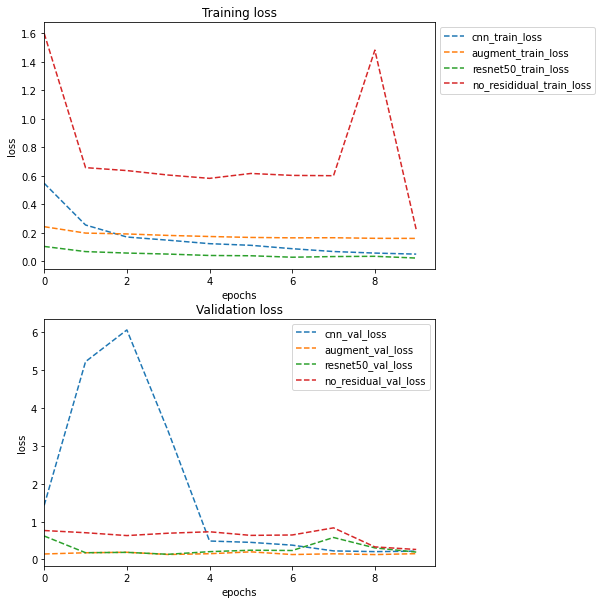

In [ ]:
N = 10
fig,ax = plt.subplots(2,1, figsize=(7,10))

# Train Loss
ax[0].plot(np.arange(0, N), history_cnn.history["loss"], '--',label="cnn_train_loss") 
ax[0].plot(np.arange(0, N), history_augment.history["loss"], '--',label="augment_train_loss") 
ax[0].plot(np.arange(0, N), history_resnet.history["loss"], '--',label="resnet50_train_loss") 
ax[0].plot(np.arange(0, N), history_resnet50_model.history["loss"],'--',label="no_resididual_train_loss") 

ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Training loss')
ax[0].set_xlim(xmin=0)
ax[0].legend(bbox_to_anchor=(1, 1))

# Test loss
ax[1].plot(np.arange(0, N), history_cnn.history["val_loss"],'--', label="cnn_val_loss")
ax[1].plot(np.arange(0, N), history_augment.history["val_loss"],'--', label="augment_val_loss")
ax[1].plot(np.arange(0, N), history_resnet.history["val_loss"],'--', label="resnet50_val_loss")
ax[1].plot(np.arange(0, N), history_resnet50_model.history["val_loss"],'--', label="no_residual_val_loss")

ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Validation loss')
ax[1].set_xlim(xmin=0)
ax[1].legend(bbox_to_anchor=(1, 1));

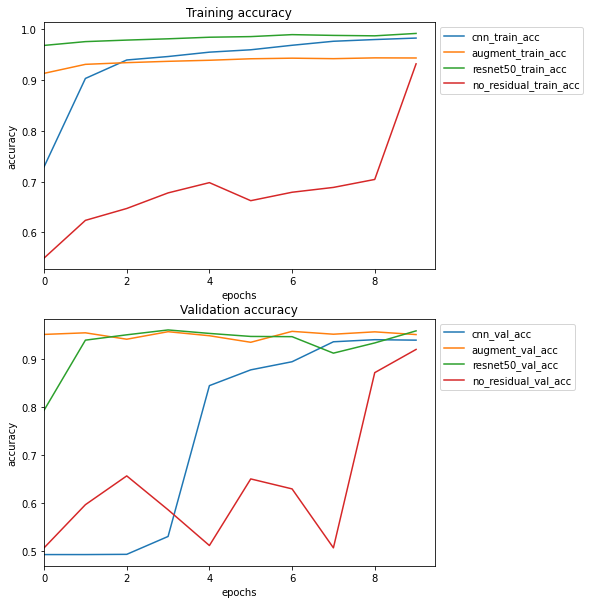

In [ ]:
N = 10
fig,ax = plt.subplots(2,1, figsize=(7,10))

#Train Accuracy
ax[0].plot(np.arange(0, N), history_cnn.history["accuracy"],label="cnn_train_acc") 
ax[0].plot(np.arange(0, N), history_augment.history["accuracy"],label="augment_train_acc") 
ax[0].plot(np.arange(0, N), history_resnet.history["accuracy"],label="resnet50_train_acc") 
ax[0].plot(np.arange(0, N), history_resnet50_model.history["accuracy"], label="no_residual_train_acc")

ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].set_title('Training accuracy');
ax[0].set_xlim(xmin=0)
ax[0].legend(bbox_to_anchor=(1, 1))

#Test Accuracy
ax[1].plot(np.arange(0, N), history_cnn.history["val_accuracy"], label="cnn_val_acc")
ax[1].plot(np.arange(0, N), history_augment.history["val_accuracy"], label="augment_val_acc")
ax[1].plot(np.arange(0, N), history_resnet.history["val_accuracy"], label="resnet50_val_acc")
ax[1].plot(np.arange(0, N), history_resnet50_model.history["val_accuracy"], label="no_residual_val_acc")

ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_title('Validation accuracy');
ax[1].set_xlim(xmin=0)
ax[1].legend(bbox_to_anchor=(1, 1));